In [1]:
import pandas as pd
data = pd.read_csv("/content/AQI DATASET - UPDATED (1).csv")
data.head()

,State/UT,Year,Population_totals,Population_male,Population_female,AQI,Disease,Total_cases,Male_deaths,Female_deaths,SO2,NO2,PM10,PM2.5,Total_deaths,AQI_levels
0,1,2017,89034,44671,44363,119.25,4,3103021,208,130,7.000,21.00,74.0,22.00,338,3
1,1,2018,89691,44986,44705,61.00,4,3149897,380,207,6.000,20.00,71.0,40.00,587,2
2,1,2019,90330,45293,45037,88.75,4,2986495,295,181,8.000,18.00,64.0,28.00,476,2
3,1,2020,90950,45591,45359,68.75,4,1790718,2062,743,6.000,16.00,56.0,28.00,2805,2
4,1,2021,91549,45880,45669,102.50,4,1897511,2833,1661,7.125,17.56,63.0,28.25,4494,3


<Axes: >

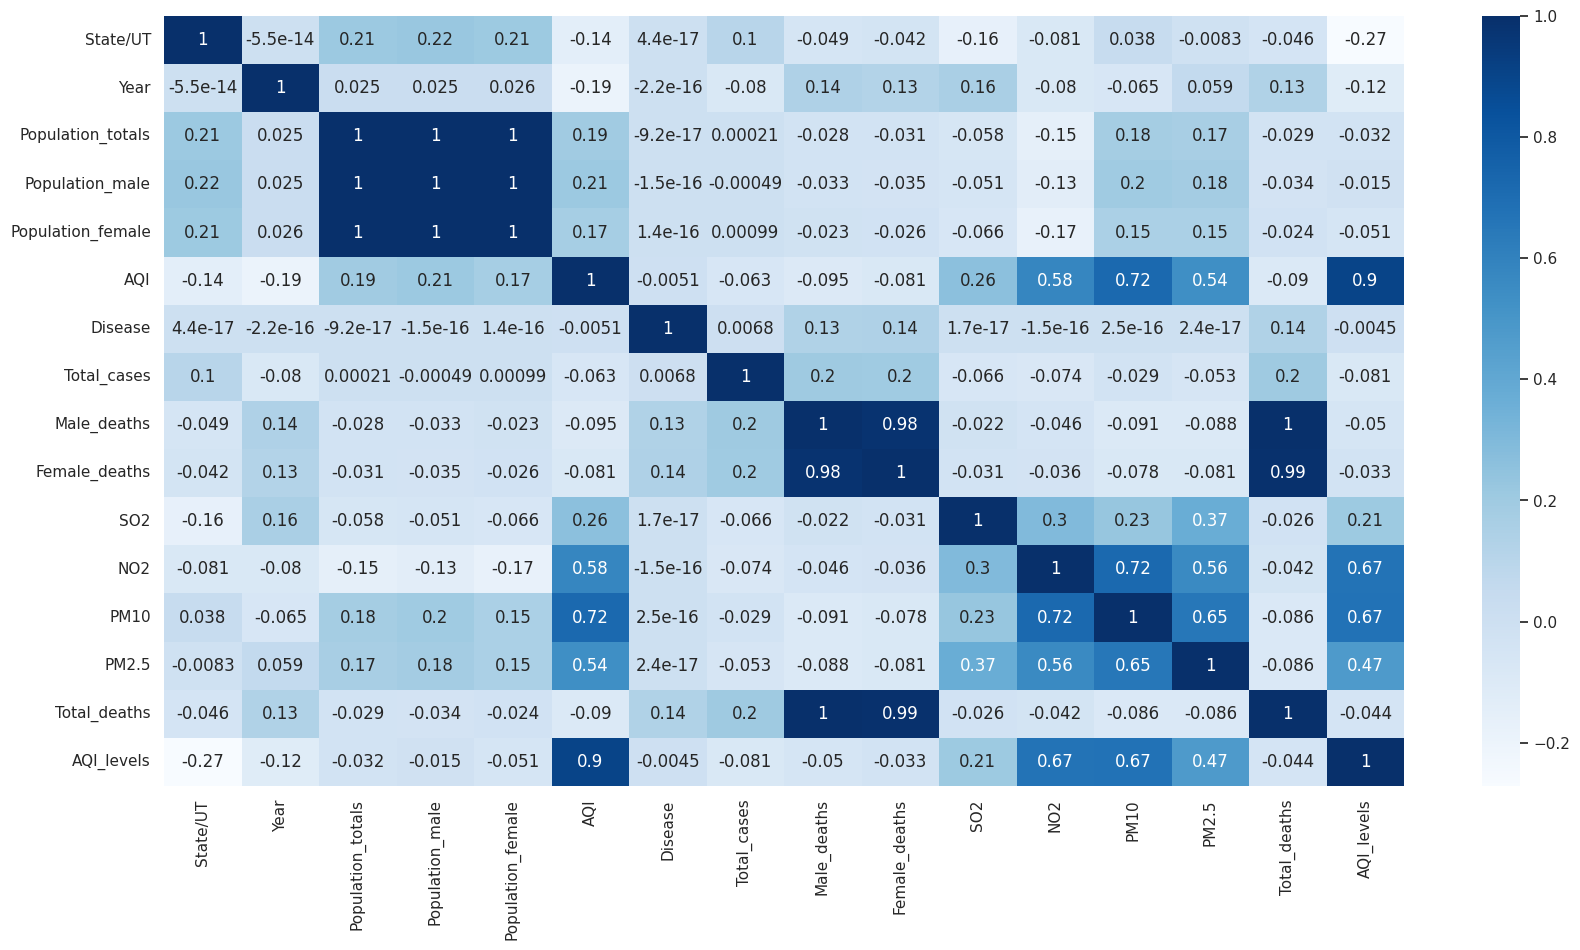

In [2]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.heatmap(data.corr(), cmap="Blues", annot=True)

In [3]:
data = data.drop(columns=['Population_totals', 'Population_male', 'Population_female', 'Total_deaths'])

<Axes: >

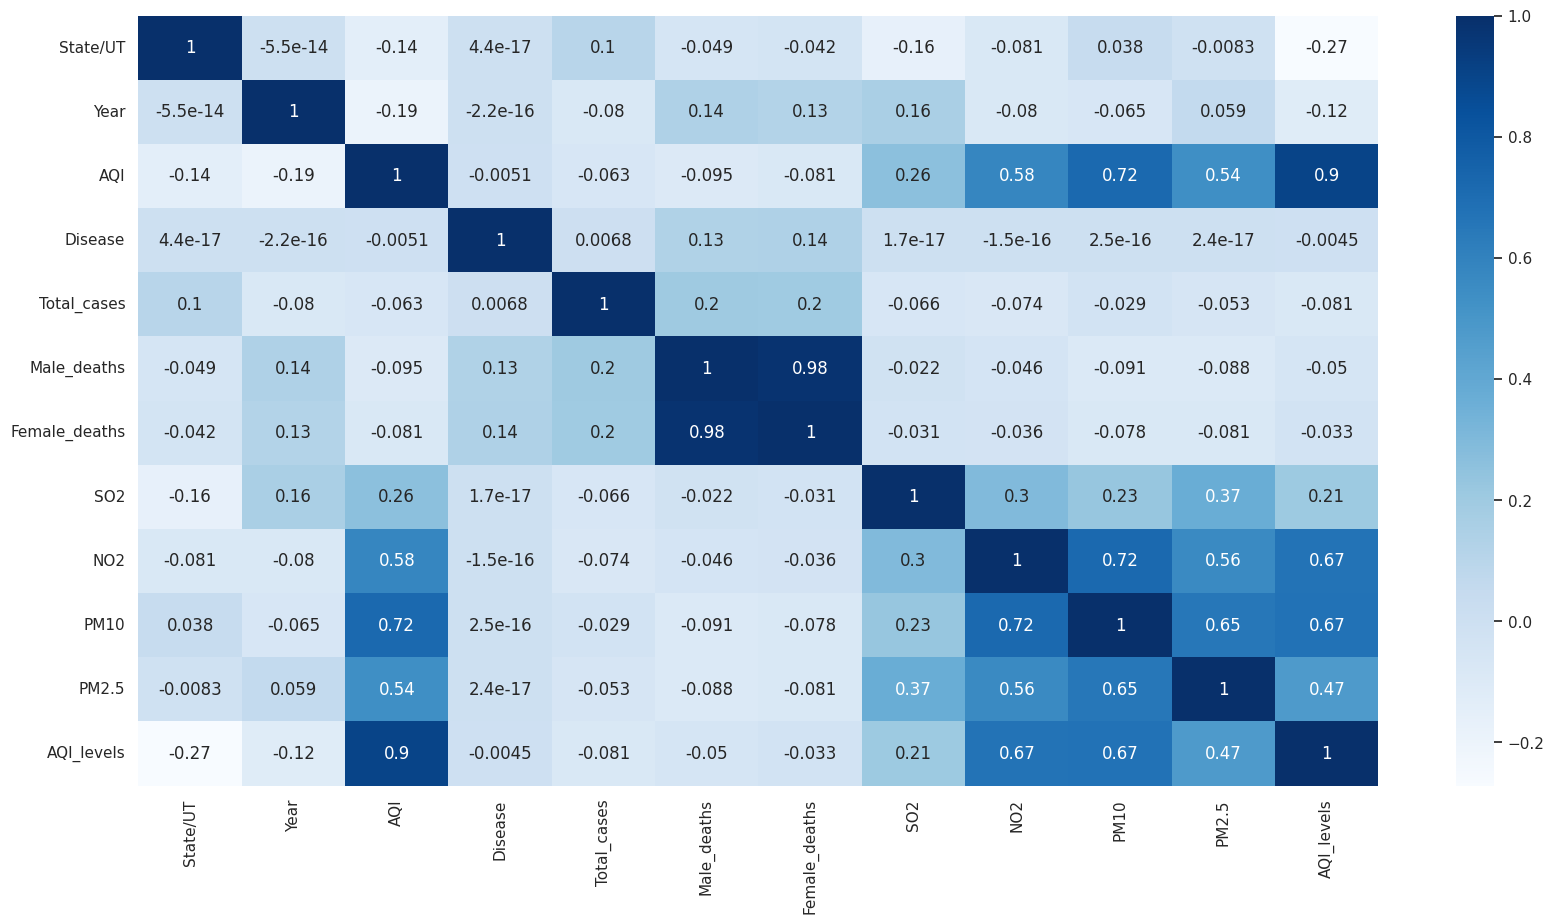

In [4]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.heatmap(data.corr(), cmap="Blues", annot=True)

In [5]:
features = ['State/UT', 'Year',  'AQI', 'Disease', 'Total_cases', 'Male_deaths', 'Female_deaths', 'SO2', 'NO2', 'PM10', 'PM2.5']
label = 'AQI_levels'
X, y = data[features].values, data[label].values
for n in range(0,5):
  print(str(n+1), "\n Features:",list(X[n]), "\n Label:", y[n])

1 
 Features: [1.0, 2017.0, 119.25, 4.0, 3103021.0, 208.0, 130.0, 7.0, 21.0, 74.0, 22.0] 
 Label: 3
2 
 Features: [1.0, 2018.0, 61.0, 4.0, 3149897.0, 380.0, 207.0, 6.0, 20.0, 71.0, 40.0] 
 Label: 2
3 
 Features: [1.0, 2019.0, 88.75, 4.0, 2986495.0, 295.0, 181.0, 8.0, 18.0, 64.0, 28.0] 
 Label: 2
4 
 Features: [1.0, 2020.0, 68.75, 4.0, 1790718.0, 2062.0, 743.0, 6.0, 16.0, 56.0, 28.0] 
 Label: 2
5 
 Features: [1.0, 2021.0, 102.5, 4.0, 1897511.0, 2833.0, 1661.0, 7.125, 17.56, 63.0, 28.25] 
 Label: 3


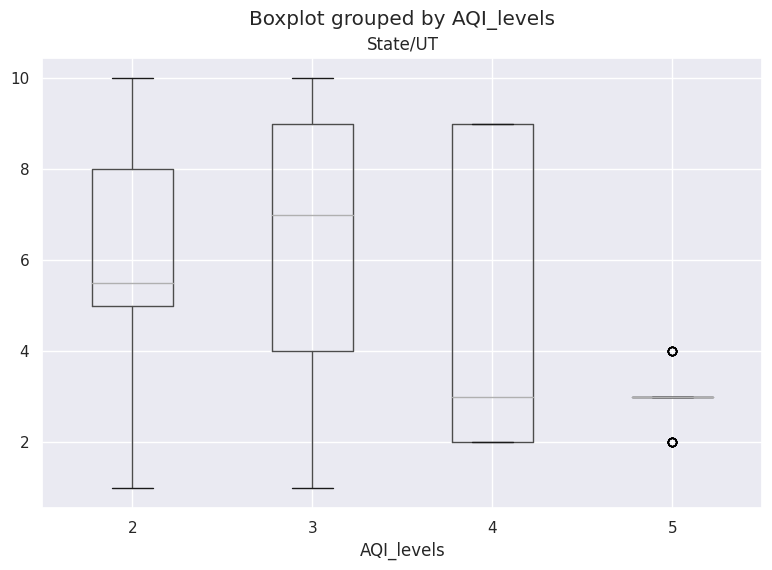

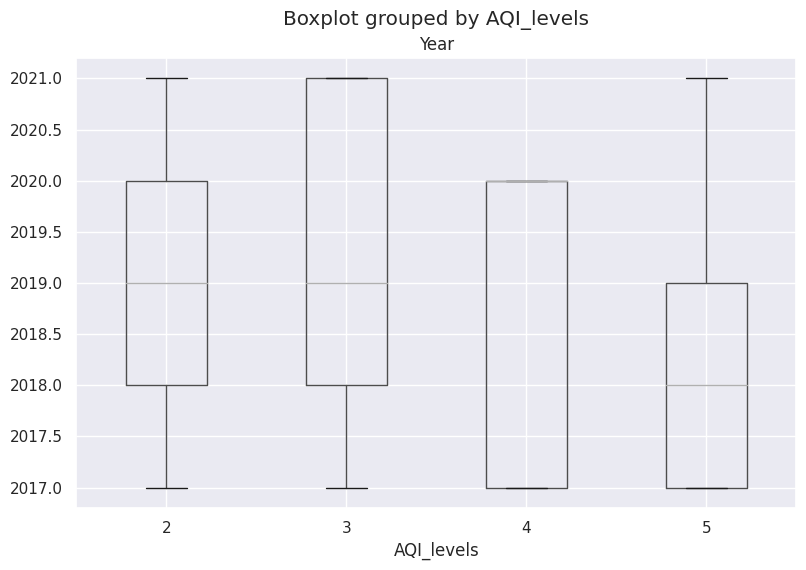

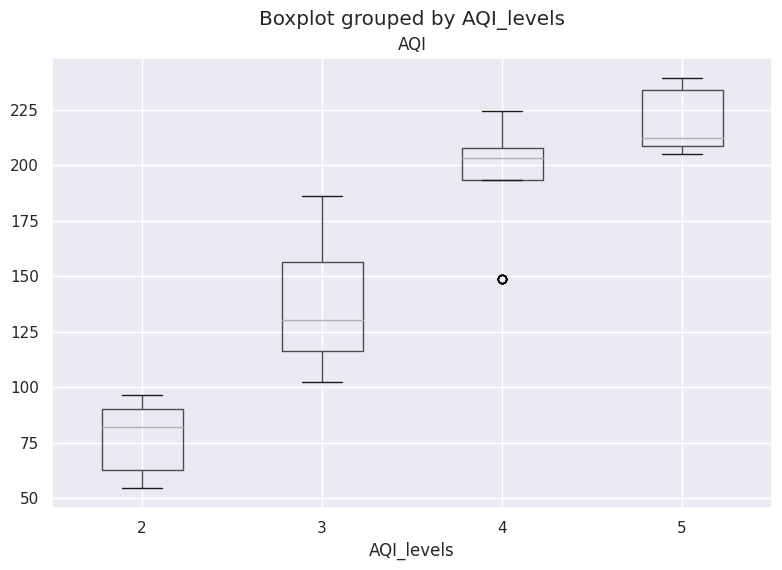

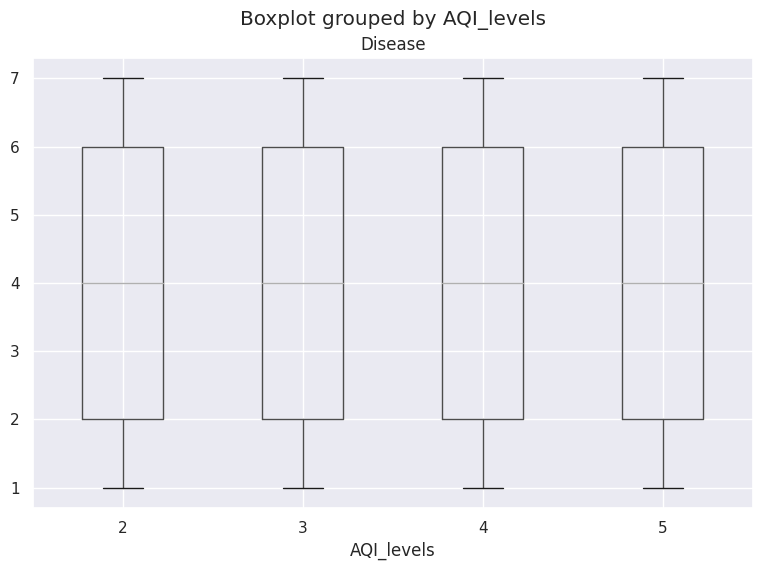

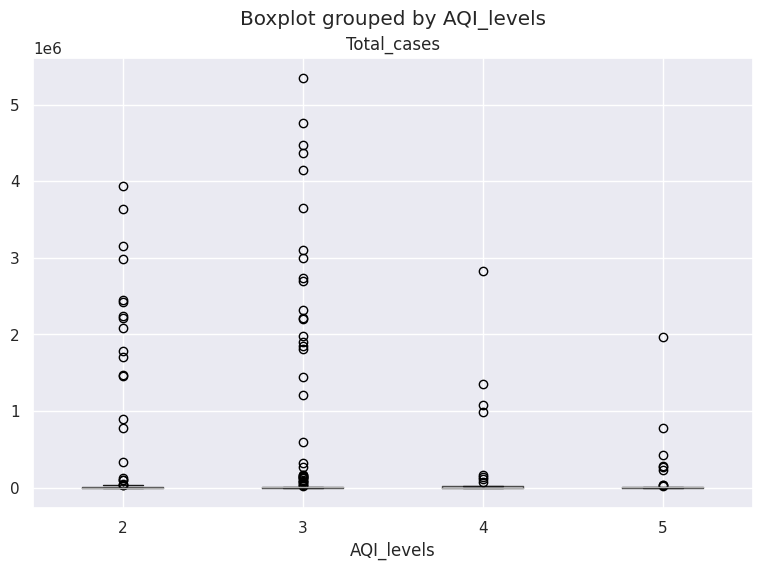

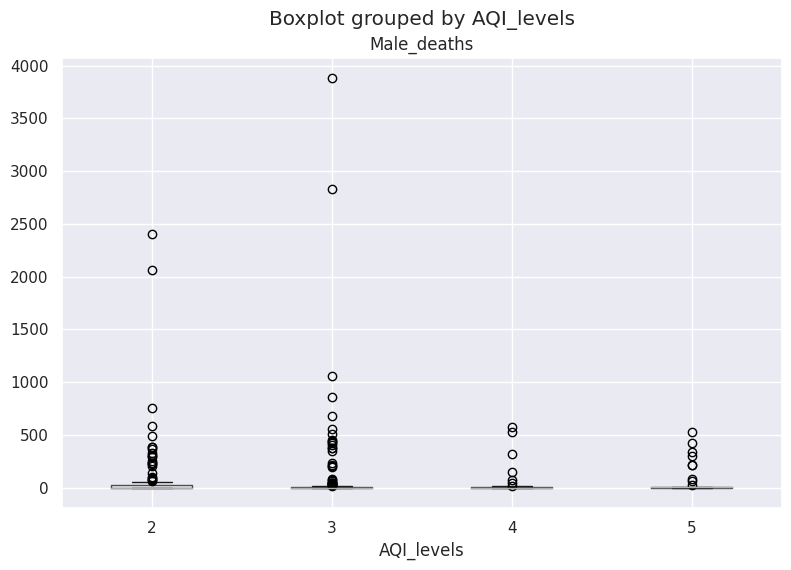

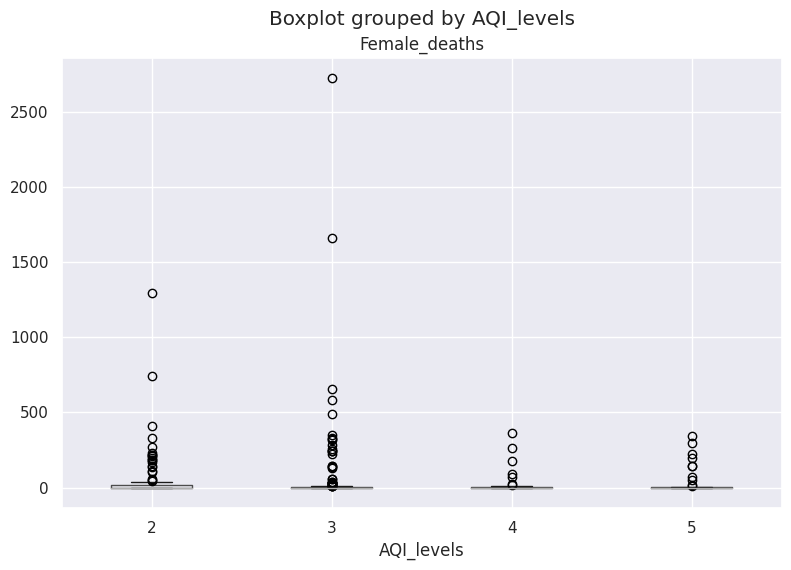

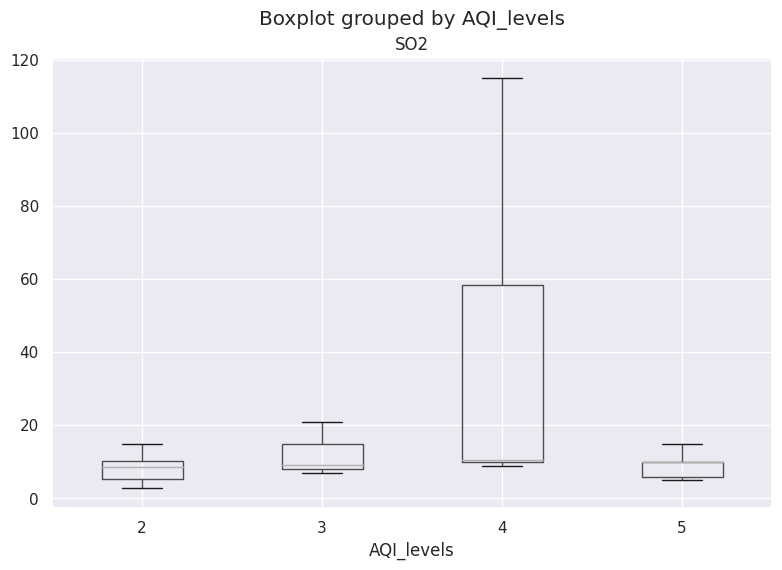

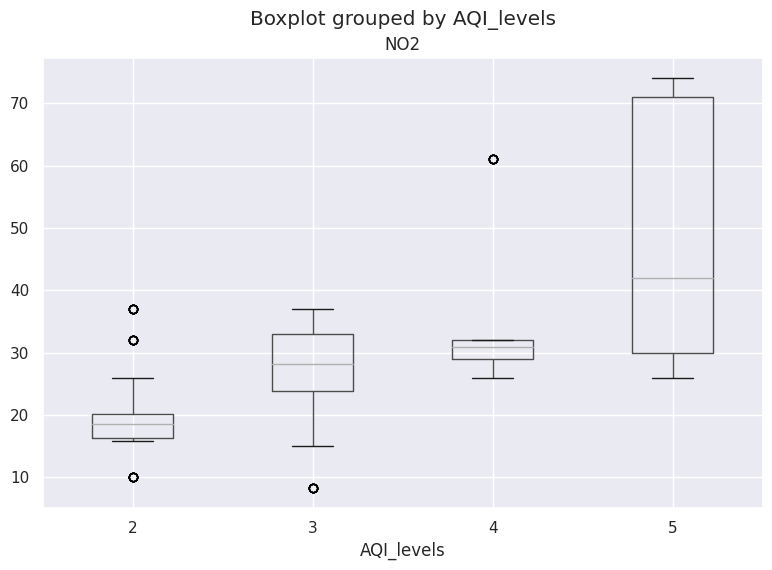

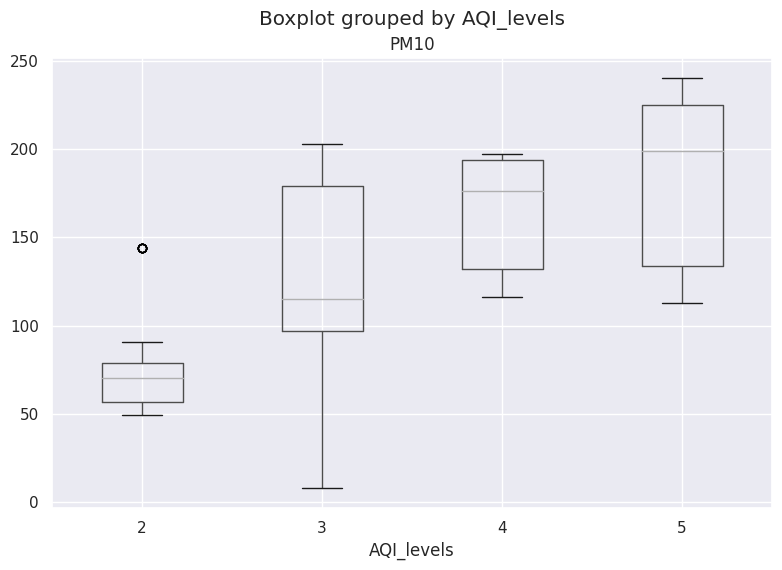

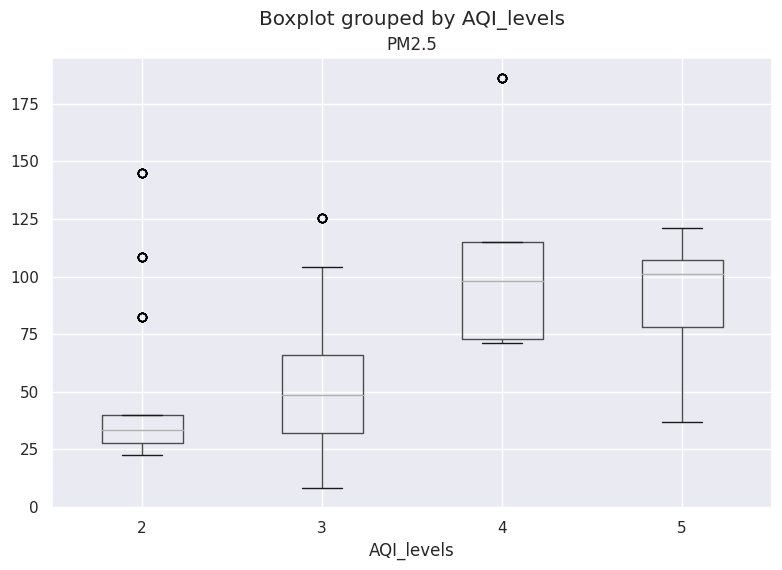

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
for col in features:
  data.boxplot(column=col, by='AQI_levels', figsize=(9,6))
  plt.title(col)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=0)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 255
Test cases: 95


In [8]:
from sklearn.linear_model import LogisticRegression
reg = 0.01
model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
print(model)

LogisticRegression(C=100.0, max_iter=10000)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels: ', y_test)

Predicted labels:  [3 2 2 2 3 2 3 3 4 3 3 3 3 3 3 2 2 3 3 2 3 3 3 2 3 3 4 2 3 3 5 5 3 5 5 3 5
 3 2 2 3 3 3 3 3 2 2 5 2 4 3 3 2 4 5 3 2 4 2 3 3 3 3 2 3 3 4 2 3 4 5 2 3 2
 2 3 3 3 2 2 2 5 2 2 5 2 4 3 3 3 5 2 3 2 2]
Actual labels:  [4 2 2 2 3 2 3 3 4 3 3 3 3 3 3 2 2 3 3 2 3 3 3 2 3 3 5 2 3 3 5 5 3 5 4 3 5
 3 2 2 3 3 3 3 3 2 2 3 2 4 3 3 2 5 5 4 2 4 2 3 3 3 4 2 3 4 4 2 3 4 5 2 3 2
 2 3 3 3 2 2 2 4 2 2 5 2 4 3 3 3 5 2 3 2 2]


In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9052631578947369


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        31
           3       0.91      0.98      0.94        42
           4       0.75      0.50      0.60        12
           5       0.73      0.80      0.76        10

    accuracy                           0.91        95
   macro avg       0.85      0.82      0.83        95
weighted avg       0.90      0.91      0.90        95



In [12]:
from sklearn.metrics import precision_score, recall_score
print('Overall precision score: ',precision_score(y_test, predictions, average='macro'))
print('Overall recall score: ', recall_score(y_test, predictions, average='macro'))

Overall precision score:  0.8470959595959595
Overall recall score:  0.819047619047619


In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[31  0  0  0]
 [ 0 41  0  1]
 [ 0  4  6  2]
 [ 0  0  2  8]]


In [14]:
scores = model.predict_proba(X_test)
print(scores)

[[1.12514236e-11 9.98745868e-01 1.25413113e-03 1.09619941e-09]
 [9.97699479e-01 2.30052064e-03 1.41469064e-11 2.39832161e-17]
 [9.99233253e-01 7.66746963e-04 6.99614561e-13 1.10916627e-18]
 [9.99796437e-01 2.03562872e-04 6.11802961e-11 3.79235221e-27]
 [9.53474152e-02 9.04652515e-01 6.97838430e-08 6.30616824e-13]
 [9.99999998e-01 2.31884591e-09 8.20708158e-20 3.36173719e-27]
 [3.88470901e-22 7.55583908e-01 2.43240960e-01 1.17513227e-03]
 [3.70244051e-21 9.99537066e-01 4.61678338e-04 1.25574331e-06]
 [7.12273603e-28 3.56417859e-01 4.08002384e-01 2.35579757e-01]
 [1.28320745e-05 9.99985797e-01 1.36998746e-06 5.25139632e-10]
 [9.74674991e-13 9.84478004e-01 1.55216369e-02 3.58923585e-07]
 [5.18110470e-04 9.99481870e-01 1.94463895e-08 1.82741133e-13]
 [3.45109421e-08 9.99980391e-01 1.95676403e-05 6.88732573e-09]
 [3.92163261e-13 9.99999996e-01 3.70787580e-09 2.35105828e-12]
 [1.00342035e-20 8.96465312e-01 1.03286356e-01 2.48331440e-04]
 [7.52496482e-01 2.47503512e-01 6.20626142e-09 9.067582

In [15]:
import pandas as pd
import pickle
df = pd.read_csv('/content/AQI DATASET - UPDATED (1).csv')
with open('/content/AQI DATASET - UPDATED (1).pkl', 'wb') as f:
  pickle.dump(df, f)
with open('/content/AQI DATASET - UPDATED (1).pkl', 'rb') as f:
  df = pickle.load(f)
print(f)

<_io.BufferedReader name='/content/AQI DATASET - UPDATED (1).pkl'>


In [16]:
import joblib
fn = '/content/AQI DATASET - UPDATED (1).pkl'
joblib.dump(model, fn)

['/content/AQI DATASET - UPDATED (1).pkl']

In [17]:
import numpy as np
model = joblib.load(fn)
X_new = np.array([[9,2019,56,1446,449875,462,21575,55646,8211,661224,105.38]])
print('New sample: {}'.format(list(X_new[0])))
pred = model.predict(X_new)
print('Predcited value is {}'.format(pred[0]))

New sample: [9.0, 2019.0, 56.0, 1446.0, 449875.0, 462.0, 21575.0, 55646.0, 8211.0, 661224.0, 105.38]
Predcited value is 3
